#PCA Analysis
Principal Component Analysis (PCA) is a method for dimensionality reduction. Its goal is to reduce the complexity of datasets with many variables (dimensions) by summarizing the most important information into a smaller number of new, uncorrelated variables, known as principal components. This helps to identify and visualize patterns in the data.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connect to google drive-Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data file from related directory
directory = "/content/drive/MyDrive/Travel tide project"

df_users = pd.read_csv(f'{directory}/user_base.csv', index_col="user_id")
print(df_users.columns)

Index(['num_sessions', 'num_empty_sessions', 'num_clicks',
       'avg_clicks_per_session', 'avg_session_duration',
       'std_session_duration', 'num_canceled_trips', 'num_not_canceled_trips',
       'num_flights', 'num_hotels', 'avg_bags', 'num_flight_discounts',
       'num_hotel_discounts', 'avg_night', 'avg_rooms', 'avg_seats',
       'avg_money_spent_per_flight', 'avg_money_spent_per_seat',
       'avg_money_spent_per_hotel', 'avg_time_after_booking',
       'num_fam_and_fri_trips', 'num_winter', 'num_spring', 'num_summer',
       'num_fall', 'avg_flight_km', 'avg_money_spent_per_km', 'gender',
       'married', 'has_children', 'home_country', 'age', 'hotel_hunter_index',
       'flight_fanatic_index', 'bundle_index'],
      dtype='object')


# To prepare our data for clustering, I encoded demographic categorical and boolean columns into numeric values (1 and 0) so they can be used in machine learning models.

In [4]:
# To prepare our data for clustering, I encoded demographic categorical and boolean columns into numeric values (1 and 0) so
# they can be used in machine learning models.
df_users["gender"] = df_users["gender"].map({"F": 0, "M": 1, "O":2})
df_users["married"] = df_users["married"].astype(int)
df_users["has_children"] = df_users["has_children"].astype(int)

In [11]:
print('different countries', df_users["home_country"].nunique())

#I've decided to keep Home Country

df_users["home_country"] = (df_users["home_country"] == 'usa').astype("int")

different countries 2


In [12]:
df_users.head()


,num_sessions,num_empty_sessions,num_clicks,avg_clicks_per_session,avg_session_duration,std_session_duration,num_canceled_trips,num_not_canceled_trips,num_flights,num_hotels,...,avg_flight_km,avg_money_spent_per_km,gender,married,has_children,home_country,age,hotel_hunter_index,flight_fanatic_index,bundle_index
user_id,,,,,,,,,,,,,,,,,,,,,
23557,2,0,19,9.5,1.200000,0.070711,0.0,2.0,0,2,...,0.000000,0.000000,0,1,0,1,67,0.666667,0.666667,0.666667
94883,2,0,48,24.0,2.966667,0.424264,0.0,2.0,4,2,...,1453.666128,0.290667,0,1,0,1,53,0.666667,0.666667,0.666667
101486,2,0,42,21.0,2.625000,0.011785,0.0,2.0,2,2,...,965.340568,0.196728,0,1,1,1,53,0.666667,0.666667,0.666667
101961,5,0,104,20.8,2.586667,0.442593,0.0,5.0,10,5,...,1321.684183,0.179108,0,1,0,1,45,0.833333,0.833333,0.833333
118043,5,0,137,27.4,3.426667,1.734639,0.0,5.0,6,4,...,2455.024509,0.362403,0,0,1,1,53,0.833333,0.833333,0.833333


In [13]:
# check
df_users.dtypes

,0
num_sessions,int64
num_empty_sessions,int64
num_clicks,int64
avg_clicks_per_session,float64
avg_session_duration,float64
std_session_duration,float64
num_canceled_trips,float64
num_not_canceled_trips,float64
num_flights,int64
num_hotels,int64


In [14]:
# PCA cannot work with NaN values therefore I Replaced NaN with 0 where possible

print(df_users.isnull().sum())

#drop gender NaN
#df_users["gender"].dropna(inplace=True)

df_users.fillna(0, inplace=True)


num_sessions                  0
num_empty_sessions            0
num_clicks                    0
avg_clicks_per_session        0
avg_session_duration          0
std_session_duration          0
num_canceled_trips            0
num_not_canceled_trips        0
num_flights                   0
num_hotels                    0
avg_bags                      0
num_flight_discounts          0
num_hotel_discounts           0
avg_night                     0
avg_rooms                     0
avg_seats                     0
avg_money_spent_per_flight    0
avg_money_spent_per_seat      0
avg_money_spent_per_hotel     0
avg_time_after_booking        0
num_fam_and_fri_trips         0
num_winter                    0
num_spring                    0
num_summer                    0
num_fall                      0
avg_flight_km                 0
avg_money_spent_per_km        0
gender                        0
married                       0
has_children                  0
home_country                  0
age     

In [15]:
# Before apply PCA, check if there is null in database
print(df_users.isnull().sum())

num_sessions                  0
num_empty_sessions            0
num_clicks                    0
avg_clicks_per_session        0
avg_session_duration          0
std_session_duration          0
num_canceled_trips            0
num_not_canceled_trips        0
num_flights                   0
num_hotels                    0
avg_bags                      0
num_flight_discounts          0
num_hotel_discounts           0
avg_night                     0
avg_rooms                     0
avg_seats                     0
avg_money_spent_per_flight    0
avg_money_spent_per_seat      0
avg_money_spent_per_hotel     0
avg_time_after_booking        0
num_fam_and_fri_trips         0
num_winter                    0
num_spring                    0
num_summer                    0
num_fall                      0
avg_flight_km                 0
avg_money_spent_per_km        0
gender                        0
married                       0
has_children                  0
home_country                  0
age     

# Data scaling(normalizing numerical features)

In [16]:
# Data scaling(normalizing numerical features)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_users)
customers_scaled = pd.DataFrame(X_scaled)
customers_scaled.index = df_users.index
customers_scaled.columns = df_users.columns

In [17]:
# check/print scaled data columns
customers_scaled.head(2)

,num_sessions,num_empty_sessions,num_clicks,avg_clicks_per_session,avg_session_duration,std_session_duration,num_canceled_trips,num_not_canceled_trips,num_flights,num_hotels,...,avg_flight_km,avg_money_spent_per_km,gender,married,has_children,home_country,age,hotel_hunter_index,flight_fanatic_index,bundle_index
user_id,,,,,,,,,,,,,,,,,,,,,
23557,-0.623856,0.0,-1.303498,-1.973063,-1.953045,-0.910070,-0.311896,-0.623856,-1.698481,-0.420212,...,-1.517216,-2.257532,-0.361377,1.11209,-0.696026,0.454001,2.117011,-0.416943,-0.416943,-0.416943
94883,-0.623856,0.0,-0.536367,0.027597,0.019778,-0.489984,-0.311896,-0.623856,-0.261985,-0.420212,...,-0.424125,1.238483,-0.361377,1.11209,-0.696026,0.454001,0.836305,-0.416943,-0.416943,-0.416943


# I want to preserve 95% of the data variance, so I have to have enough pca components. The number of components we need for this should be determined by Python.

In [19]:
# We want to be able to preserve 95% of the data variance, so we have to have enough pca components

#The number of components we need for this should be determined by Python.

var_exp = 0.95
pca = PCA(n_components = var_exp, random_state= 42)
customers_pca = pca.fit_transform(customers_scaled)


customers_pca = pd.DataFrame(customers_pca)
customers_pca.index = customers_scaled.index
customers_pca.columns = [f"pca_{i}"for i in range(customers_pca.shape[1])]

customers_pca.to_csv(f'{directory}/user_pca.csv')
print(customers_pca.shape)
customers_pca.head()


(5442, 20)


,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19
user_id,,,,,,,,,,,,,,,,,,,,
23557,-3.429441,-3.418231,-3.320134,0.468178,1.377395,2.265260,-0.576054,-0.897320,-0.380868,-0.360521,0.048232,0.514445,-1.514066,-0.201236,0.720454,-0.712344,0.089671,0.067348,-0.781497,0.938860
94883,-0.957907,1.266193,0.177107,1.480327,-2.069751,0.761936,-0.691564,-0.879786,-0.376304,-0.984331,-1.324357,-0.102675,-0.748436,0.240704,-0.458222,-0.051591,0.052344,0.239440,0.278264,0.085638
101486,-2.241619,-0.746612,-0.757221,0.961468,-0.519950,1.698168,-0.962612,-0.885771,-0.289243,0.652978,1.541911,1.027198,0.777682,0.804140,-0.221259,-1.825600,-0.092917,-0.055318,-0.015926,-0.027606
101961,3.661233,-1.914617,-1.194891,-0.836790,-0.349228,0.569078,-0.935795,-0.587189,0.107719,-0.446717,-0.728123,0.234118,-0.036748,0.951645,-0.787592,0.482645,0.280748,-0.029368,1.246243,-0.360206
118043,5.308640,1.690194,-0.403939,2.245428,0.573825,0.301102,-1.455153,-0.288848,1.249576,0.753263,0.754925,0.795186,0.472412,-1.613456,3.353861,-1.056898,0.253018,-0.759766,-1.231233,-1.022157


# # Display eigenvalues ​​- coefficients that are crucial for every PC

In [20]:
# # Display eigenvalues ​​- coefficients that are crucial for every PC
component_matrix = pd.DataFrame(pca.components_).T
component_matrix.columns = [f"pca_{i}"for i in range(component_matrix.shape[1])]
component_matrix.index = customers_scaled.columns
component_matrix

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19
num_sessions,3.205382e-01,-8.722537e-02,-9.499951e-02,-4.627252e-02,2.743690e-02,-1.109849e-02,-7.607249e-02,3.747446e-02,-1.457692e-02,3.184126e-03,2.353069e-03,-1.411654e-02,6.192976e-03,-1.887405e-02,-6.591048e-02,-2.108527e-02,1.368661e-02,-5.163348e-02,5.063200e-02,1.363209e-02
num_empty_sessions,1.110223e-16,-5.551115e-17,1.387779e-17,-1.734723e-17,-7.806256e-17,1.082034e-16,2.185752e-16,1.476683e-16,-6.017322e-17,-1.004174e-16,-4.669422e-16,-2.127205e-16,1.359996e-16,-3.011914e-16,5.204170e-17,-1.036497e-16,-4.848552e-16,-1.994932e-16,1.682682e-16,-3.057450e-16
num_clicks,3.050091e-01,-8.036169e-02,1.770348e-01,4.410724e-03,9.095059e-02,5.085319e-03,-8.202327e-02,3.811340e-02,-5.218045e-03,-1.440458e-02,2.272007e-03,-1.879105e-02,-1.604949e-03,-9.656170e-03,-5.407459e-02,-4.135748e-02,2.898815e-02,-7.689088e-02,5.152857e-02,3.883160e-02
avg_clicks_per_session,6.924676e-02,1.917477e-02,5.892002e-01,1.105482e-01,1.294513e-01,3.764763e-02,-1.059852e-02,6.978719e-03,2.169937e-03,-1.513890e-02,-8.019148e-05,-3.903369e-03,2.135198e-03,1.863370e-02,2.710511e-02,-2.212087e-02,2.628788e-02,-2.127527e-01,1.431213e-01,-2.796003e-02
avg_session_duration,6.917342e-02,1.872760e-02,5.893465e-01,1.100646e-01,1.294388e-01,3.710181e-02,-1.024765e-02,6.636404e-03,1.810308e-03,-1.514006e-02,-4.531950e-04,-4.053141e-03,1.733715e-03,1.792754e-02,2.624796e-02,-2.197721e-02,2.607323e-02,-2.130296e-01,1.423028e-01,-2.916223e-02
std_session_duration,1.566645e-01,-2.943925e-02,3.386418e-01,7.885051e-02,2.026777e-01,5.172518e-02,3.546050e-02,2.660537e-02,6.182468e-02,-2.264828e-02,-1.353699e-02,1.594142e-02,1.847273e-02,-6.737218e-03,1.418255e-02,9.751778e-03,-4.722597e-02,6.675707e-01,-4.498580e-01,1.129865e-01
num_canceled_trips,-1.370797e-02,-5.054611e-03,2.990694e-02,-8.813634e-03,-6.670123e-02,-5.608592e-03,7.666378e-01,-2.943189e-01,1.838634e-01,-7.072599e-02,2.445612e-02,2.102097e-01,-4.014320e-02,1.340581e-01,1.478039e-01,-9.607600e-02,9.117313e-02,-1.489109e-01,1.056813e-01,2.858930e-02
num_not_canceled_trips,3.205382e-01,-8.722537e-02,-9.499951e-02,-4.627252e-02,2.743690e-02,-1.109849e-02,-7.607249e-02,3.747446e-02,-1.457692e-02,3.184126e-03,2.353069e-03,-1.411654e-02,6.192976e-03,-1.887405e-02,-6.591048e-02,-2.108527e-02,1.368661e-02,-5.163348e-02,5.063200e-02,1.363209e-02
num_flights,3.034080e-01,-2.348111e-02,-1.044704e-02,-7.140847e-02,-1.011416e-01,-3.298720e-02,-9.306701e-02,3.132198e-02,-3.453735e-02,-1.442771e-02,1.344600e-03,-1.586904e-02,-2.306938e-02,-5.809191e-03,-8.269793e-02,-3.850118e-02,3.761008e-02,-1.541248e-01,8.440916e-02,-6.856074e-02
num_hotels,2.985776e-01,-1.104818e-01,-6.716202e-02,-1.559738e-02,4.000523e-02,-5.731374e-03,-7.411348e-02,1.843903e-02,-3.409336e-02,1.699001e-02,1.289961e-02,-2.269391e-02,2.704737e-02,-8.030351e-03,-7.224067e-02,-1.451094e-02,-3.841316e-02,-1.507461e-01,1.276312e-01,5.778657e-02


# in this step we perform PCA. n_commponents = None in order to calculate the variance of all possible principal components.

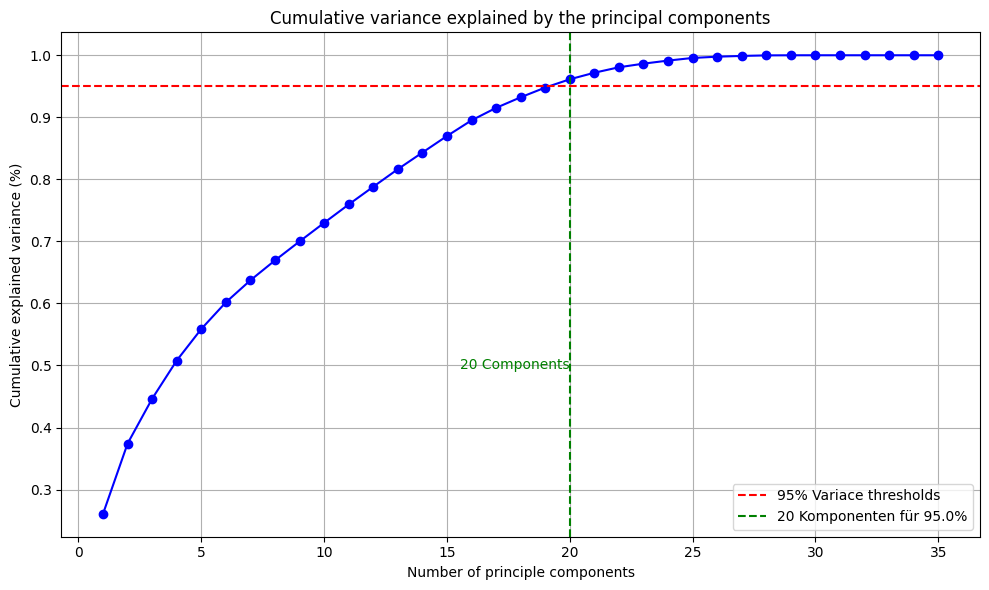

In [22]:
# in this step we perform PCA. n_commponents = None in order to
# calculate the variance of all possible principal components.
pca = PCA(n_components=None, random_state= 42)
pca.fit(X_scaled)

# Then Calculate Cumulative Variance
# The 'explained_variance_ratio_' indicates the percentage of the variance that is explained by each principal component.

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# display graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative variance explained by the principal components')
plt.xlabel('Number of principle components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variace thresholds ')

# we have to find the point at which the cumulative variance exceeds 95%
n_components_95 = np.where(cumulative_variance >= var_exp)[0][0] + 1
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'{n_components_95} Komponenten für {var_exp * 100}%')
plt.text(n_components_95, 0.5, f'{n_components_95} Components', color='g', ha='right', va='center')

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [23]:
cumulative_variance

array([0.26094183, 0.37420836, 0.44649005, 0.50799487, 0.55885268,
       0.60178019, 0.6373265 , 0.66938515, 0.69991977, 0.72990764,
       0.7594774 , 0.7880646 , 0.81634972, 0.84316062, 0.86982819,
       0.89507528, 0.91520216, 0.93224652, 0.94792089, 0.96127057,
       0.97183401, 0.98062773, 0.9864632 , 0.99141351, 0.99565   ,
       0.99770228, 0.99891581, 0.9997831 , 0.99998051, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

Now let's look at which combination of variables contributes most to our component value. This will help us understand our components a little better.

This PCA heatmap shows that most principal components are driven by a small number of strongly loading features, indicating that the model has learned several distinct and interpretable behavioral dimensions rather than diffuse combinations of all variables. In particular, clusters of high loadings appear around logically related groups such as flight activity and spending, hotel and accommodation behavior, online engagement (sessions, clicks, duration), seasonality of travel, and group or family travel characteristics. This suggests that the underlying structure of the data is organized around clear travel‐behavior patterns rather than being dominated by demographic attributes.

The main takeaway is that behavioral features contribute far more to explaining variance than demographic indicators, which appear only in a limited number of components and with lower overall influence. Practically, this means the reduced PCA space captures meaningful traveler archetypes—such as frequent flyers, hotel-focused travelers, deal-seekers, or high-engagement users—which can be leveraged for segmentation, clustering, or downstream modeling. Overall, the heatmap supports that PCA has successfully compressed correlated variables into a smaller set of interpretable latent factors while preserving the most important information in the dataset.

The heatmap confirms that TravelTide users naturally separate into meaningful behavioral groups based on engagement, spending, trip composition, discount sensitivity, and life stage—making PCA + clustering an appropriate approach.




In [25]:
from google.colab import files

# Save the DataFrame to the current working directory
customers_pca.to_csv("user_pca_analysis.csv", index=False)

In [26]:
# file downloaded
from google.colab import files

# Define the full path to the file
file_path = 'user_pca_analysis.csv'

# Download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>